# Data Science Case Study         

## Rishabh Samra, Final Year MS Scholar, IIT-Madras

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [2]:
Baselines = pd.read_csv('/home/rishabh/Downloads/JaiKisan/Data/baselines.csv')
LabVital = pd.read_csv('/home/rishabh/Downloads/JaiKisan/Data/lab and vitals.csv')

In [3]:
Baselines.isnull().sum()    #No Empty Values

mrn                             0
Age                             0
sex.factor                      0
bmi                             0
hypoxia_ed.factor               0
smoke_vape                      0
dm.factor                       0
htn.factor                      0
pulm___1.factor                 0
renal___1.factor                0
renal___2.factor                0
cad.factor                      0
cancer                          0
any_immunosuppression           0
symptoms___1.factor             0
symptoms___2.factor             0
symptoms___10.factor            0
symptoms___9.factor             0
symptoms___8.factor             0
symptoms___3.factor             0
first_cxr_results___0.factor    0
first_cxr_results___1.factor    0
first_cxr_results___2.factor    0
first_cxr_results___3.factor    0
duration_symptoms               0
Ed_before_order_set             0
event                           0
dtype: int64

In [4]:
Baselines.describe()

,mrn,Age,bmi,duration_symptoms
count,1.345000e+03,1345.000000,1345.000000,1345.000000
mean,5.518217e+07,65.424301,27.844956,8.896654
std,3.899901e+07,17.321518,6.513850,5.154361
min,6.555280e+05,-2.079025,9.861328,1.000000
25%,6.467320e+06,54.142753,23.596934,5.000000
50%,7.670870e+07,66.963905,27.237496,9.000000
75%,9.007959e+07,77.862961,30.961962,11.000000
max,9.028996e+07,113.674338,58.904689,35.000000


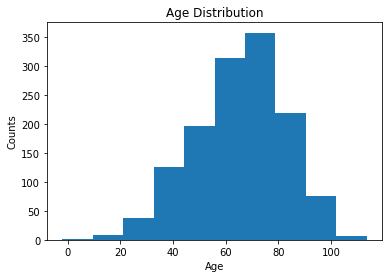

In [5]:
plt.hist(Baselines["Age"])
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age Distribution')
plt.show()

In [6]:
#Minimum value of age clipped to 0
Baselines.loc[(Baselines['Age'] < 0), 'Age']=65
#df.loc[(df.Event == 'Dance'),"Event']='Hip-Hop'
Baselines.describe()

,mrn,Age,bmi,duration_symptoms
count,1.345000e+03,1345.000000,1345.000000,1345.000000
mean,5.518217e+07,65.474174,27.844956,8.896654
std,3.899901e+07,17.223304,6.513850,5.154361
min,6.555280e+05,5.408467,9.861328,1.000000
25%,6.467320e+06,54.153658,23.596934,5.000000
50%,7.670870e+07,66.963905,27.237496,9.000000
75%,9.007959e+07,77.862961,30.961962,11.000000
max,9.028996e+07,113.674338,58.904689,35.000000


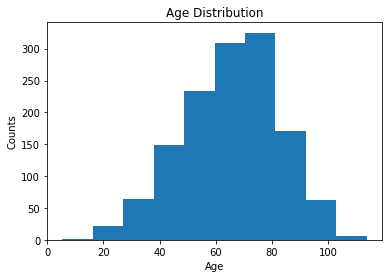

In [7]:
plt.hist(Baselines["Age"])
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age Distribution')
plt.show()

In [8]:
Baselines.groupby(['sex.factor','event']).size().reset_index(name='count')
#% of Males requiring Ventilators : 48.8%
#% of Females requiring Ventilators : 46.8%

,sex.factor,event,count
0,Female,No,296
1,Female,Yes,261
2,Male,No,404
3,Male,Yes,384


No handles with labels found to put in legend.


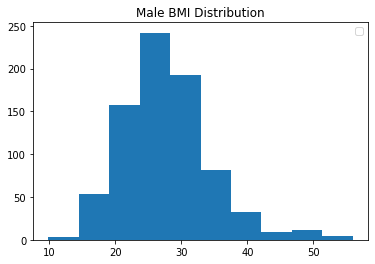

No handles with labels found to put in legend.


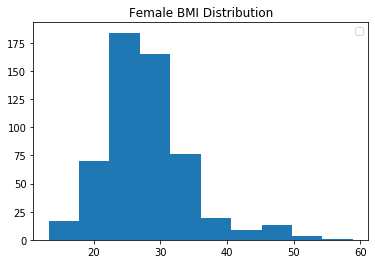

In [9]:
plt.hist(Baselines.loc[Baselines['sex.factor'] == 'Male', "bmi"])
plt.title('Male BMI Distribution')
plt.legend()
plt.show()
plt.hist(Baselines.loc[Baselines['sex.factor'] == 'Female', "bmi"])
plt.title('Female BMI Distribution')
plt.legend()
plt.show()

In [10]:
Baselines.groupby(['cancer','event']).size().reset_index(name='count')
# % of cancer people to whom ventilator is assigned: 32.35
# % of non-cancer patients to whom ventilator is assigned: 49.27

,cancer,event,count
0,No,No,631
1,No,Yes,612
2,Yes,No,69
3,Yes,Yes,33


In [11]:
#Replacing Event values of Yes/No with 0/1
d = {'No': 0, 'Yes': 1}
Baselines['event'] = Baselines['event'].map(d).fillna(Baselines['event'])

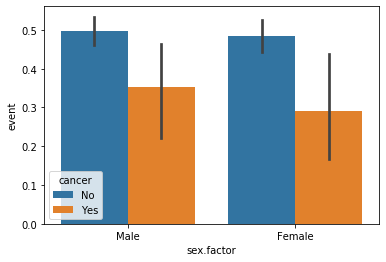

In [12]:
#We can infer that there is more chance of assigning ventilators to patients not having cancer
#Also males are having high chance of using ventilators as compared to females.
sns.barplot(x="sex.factor", y="event", hue="cancer", data=Baselines)

In [13]:
Baselines.groupby(['any_immunosuppression','event']).size().reset_index(name='count')
#% of immunosuppressed people to whom ventilator is supplied: 60
#% of non-immunosuppressed people to whom ventilator is supplied: 47.6s

,any_immunosuppression,event,count
0,Yes,0,16
1,Yes,1,24
2,unknown/No,0,684
3,unknown/No,1,621


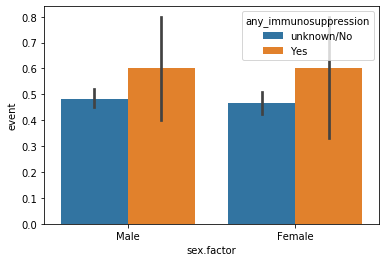

In [14]:
sns.barplot(x="sex.factor", y="event", hue="any_immunosuppression", data=Baselines)

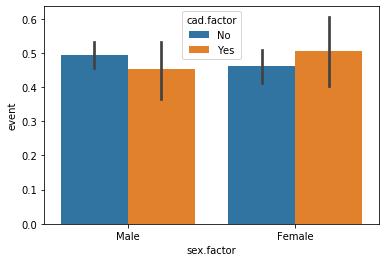

In [15]:
sns.barplot(x="sex.factor", y="event", hue="cad.factor", data=Baselines)

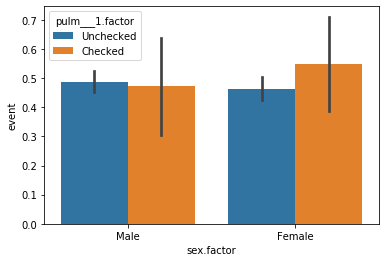

In [16]:
sns.barplot(x="sex.factor", y="event", hue="pulm___1.factor", data=Baselines)

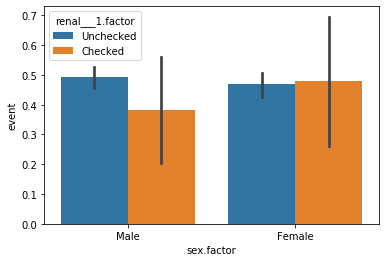

In [17]:
sns.barplot(x="sex.factor", y="event", hue="renal___1.factor", data=Baselines)

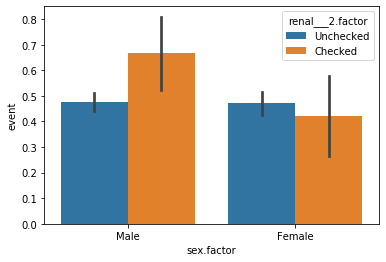

In [18]:
sns.barplot(x="sex.factor", y="event", hue="renal___2.factor", data=Baselines)

In [ ]:
sns.barplot(x="sex.factor", y="event", hue="symptoms___1.factor", data=Baselines)

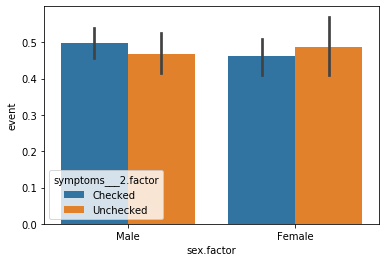

In [19]:
sns.barplot(x="sex.factor", y="event", hue="symptoms___2.factor", data=Baselines)

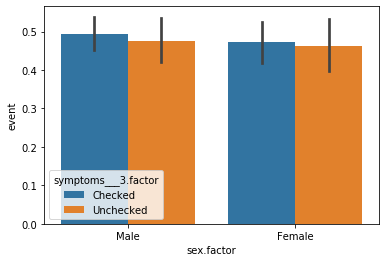

In [20]:
sns.barplot(x="sex.factor", y="event", hue="symptoms___3.factor", data=Baselines)

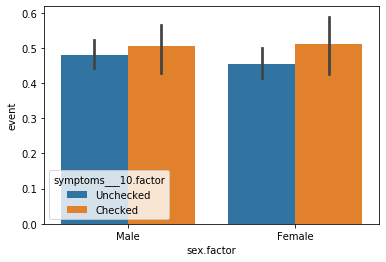

In [23]:
sns.barplot(x="sex.factor", y="event", hue="symptoms___10.factor", data=Baselines)

In [ ]:
sns.barplot(x="sex.factor", y="event", hue="first_cxr_results___0.factor", data=Baselines)

In [ ]:
sns.barplot(x="sex.factor", y="event", hue="first_cxr_results___1.factor", data=Baselines)

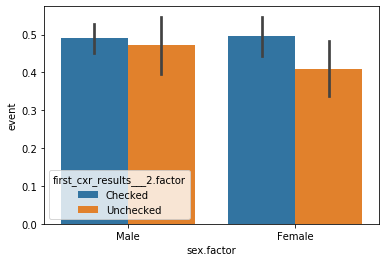

In [21]:
sns.barplot(x="sex.factor", y="event", hue="first_cxr_results___2.factor", data=Baselines)

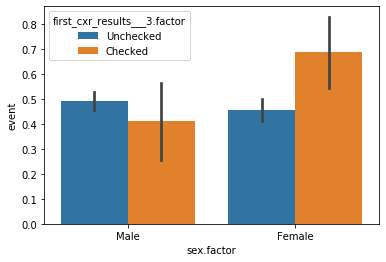

In [22]:
sns.barplot(x="sex.factor", y="event", hue="first_cxr_results___3.factor", data=Baselines)

In [24]:
Baselines.groupby(['symptoms___1.factor','symptoms___2.factor','event']).size().reset_index(name='count')

,symptoms___1.factor,symptoms___2.factor,event,count
0,Checked,Checked,0,295
1,Checked,Checked,1,292
2,Checked,Unchecked,0,138
3,Checked,Unchecked,1,139
4,Unchecked,Checked,0,188
5,Unchecked,Checked,1,157
6,Unchecked,Unchecked,0,79
7,Unchecked,Unchecked,1,57


In [25]:
Baselines.groupby(['symptoms___2.factor','pulm___1.factor','event']).size().reset_index(name='count')

,symptoms___2.factor,pulm___1.factor,event,count
0,Checked,Checked,0,24
1,Checked,Checked,1,24
2,Checked,Unchecked,0,459
3,Checked,Unchecked,1,425
4,Unchecked,Checked,0,9
5,Unchecked,Checked,1,10
6,Unchecked,Unchecked,0,208
7,Unchecked,Unchecked,1,186


In [26]:
Baselines.groupby(['symptoms___2.factor','symptoms___3.factor','event']).size().reset_index(name='count')

,symptoms___2.factor,symptoms___3.factor,event,count
0,Checked,Checked,0,297
1,Checked,Checked,1,283
2,Checked,Unchecked,0,186
3,Checked,Unchecked,1,166
4,Unchecked,Checked,0,125
5,Unchecked,Checked,1,115
6,Unchecked,Unchecked,0,92
7,Unchecked,Unchecked,1,81


## Lab and Vitals Dataset

In [ ]:
LabVital

In [27]:
LabVital.name.unique()

array(['s_bp_noninvasive (d)', 'vs_bp_noninvasive (s)', 'vs_hr_hr',
       'xp_resp_rate_pt', 'xp_resp_spo2'], dtype=object)

In [ ]:
# LabVital = LabVital.astype({"subject":'str', "value":'str'})
# print(LabVital.dtypes)

In [28]:
#Dropped NaN Values
LabVit = LabVital.dropna()
print(LabVit)

                        name   subject      value            time_stamp
4       s_bp_noninvasive (d)  89909248  62.435513  2020-07-09T00:06:47Z
8       s_bp_noninvasive (d)  89909248  59.183847  2020-07-09T11:05:04Z
9       s_bp_noninvasive (d)  89909248  61.897375  2020-07-09T13:49:38Z
10      s_bp_noninvasive (d)  89909248  63.328003  2020-07-09T16:34:12Z
11      s_bp_noninvasive (d)  89909248  58.359772  2020-07-09T19:18:47Z
...                      ...       ...        ...                   ...
708101          xp_resp_spo2   7252819  91.374689  2020-07-08T16:29:55Z
708102          xp_resp_spo2   7252819  92.573189  2020-07-08T18:16:35Z
708103          xp_resp_spo2   7252819  92.588154  2020-07-08T20:03:15Z
708104          xp_resp_spo2   7252819  93.327085  2020-07-08T21:49:55Z
708105          xp_resp_spo2   7252819  91.875465  2020-07-08T23:36:35Z

[622291 rows x 4 columns]


In [29]:
#Does Mean of all the grouped values
LVMean = LabVit.groupby(['subject', 'name'],as_index = False).agg({'value':'mean'})
LaViMean=LVMean.pivot(index='subject', columns='name', values='value').reset_index()
LaViMean=LaViMean.rename(columns = {"s_bp_noninvasive (d)":"s_bp_noninvasive(d)Avg","vs_bp_noninvasive (s)":"vs_bp_noninvasive(s)Avg","vs_hr_hr":"vs_hr_hrAvg","xp_resp_rate_pt":"xp_resp_rate_ptAvg","xp_resp_spo2":"xp_resp_spo2Avg"})
LaViMean.head()

name,subject,s_bp_noninvasive(d)Avg,vs_bp_noninvasive(s)Avg,vs_hr_hrAvg,xp_resp_rate_ptAvg,xp_resp_spo2Avg
0,655528,61.162459,129.902067,72.801656,30.400445,91.445496
1,729545,58.777900,128.472046,72.903227,29.859476,92.746338
2,805568,60.488792,129.666909,74.767961,29.835982,91.200127
3,895876,59.276564,131.727024,76.640413,30.124052,92.662587
4,905164,59.334065,129.495319,77.028180,28.720727,91.492369


In [30]:
#Does Minimum of all the grouped values

LVMin = LabVit.groupby(['subject', 'name'],as_index = False).agg({'value':'min'})
LaViMin=LVMin.pivot(index='subject', columns='name', values='value').reset_index()
LaViMin=LaViMin.rename(columns = {"s_bp_noninvasive (d)":"s_bp_noninvasive(d)Min","vs_bp_noninvasive (s)":"vs_bp_noninvasive(s)Min","vs_hr_hr":"vs_hr_hrMin","xp_resp_rate_pt":"xp_resp_rate_ptMin","xp_resp_spo2":"xp_resp_spo2Min"})
LaViMin.head()

name,subject,s_bp_noninvasive(d)Min,vs_bp_noninvasive(s)Min,vs_hr_hrMin,xp_resp_rate_ptMin,xp_resp_spo2Min
0,655528,55.864589,124.909075,66.680792,27.394691,85.851285
1,729545,54.336709,125.390764,66.978891,28.576244,86.892212
2,805568,53.678706,124.513776,71.122778,23.515832,87.472743
3,895876,55.895045,126.102565,72.864779,25.249702,87.810329
4,905164,57.022347,125.715506,72.893187,24.693358,86.366743


In [31]:
#Does Maximum of all the grouped values
LVMax = LabVit.groupby(['subject', 'name'],as_index = False).agg({'value':'max'})
LaViMax=LVMax.pivot(index='subject', columns='name', values='value').reset_index()
LaViMax=LaViMax.rename(columns = {"s_bp_noninvasive (d)":"s_bp_noninvasive(d)Max","vs_bp_noninvasive (s)":"vs_bp_noninvasive(s)Max","vs_hr_hr":"vs_hr_hrMax","xp_resp_rate_pt":"xp_resp_rate_ptMax","xp_resp_spo2":"xp_resp_spo2Max"})
LaViMax.head()

name,subject,s_bp_noninvasive(d)Max,vs_bp_noninvasive(s)Max,vs_hr_hrMax,xp_resp_rate_ptMax,xp_resp_spo2Max
0,655528,65.358869,134.885183,77.408236,33.976935,99.261517
1,729545,62.797679,135.156700,77.364256,31.598743,96.216565
2,805568,64.848642,135.640160,81.120618,34.848911,94.663084
3,895876,62.823134,137.934264,79.806152,33.890384,97.485132
4,905164,62.964323,133.997336,80.893087,34.020580,94.581302


In [32]:
Baselines = Baselines.rename(columns = {"mrn":"subject"})

In [33]:
combined = pd.merge(Baselines, LaViMean, on = 'subject', how='left')

In [34]:
combined = pd.merge(combined, LaViMin, on = 'subject', how='left')

In [35]:
combined = pd.merge(combined, LaViMax, on = 'subject', how='left')

In [36]:
final_data = pd.get_dummies(combined.drop(columns=['subject']),drop_first = True)
final_data.T

,0,1,2,3,4,5,6,7,8,9,...,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344
Age,62.321679,78.625586,70.460677,59.043149,90.477229,70.614480,72.287110,47.817602,62.987040,76.243595,...,89.336410,77.719834,40.176299,84.430982,108.897797,43.972308,31.864515,20.301802,98.249858,64.086610
bmi,20.388645,27.554594,34.141729,19.833296,19.858003,28.132920,34.979119,26.842840,33.686343,21.458219,...,33.719737,18.668466,26.296768,30.421071,35.377276,29.990926,28.560150,25.636694,22.520367,28.502931
duration_symptoms,8.000000,20.000000,9.000000,7.000000,25.000000,6.000000,7.000000,9.000000,13.000000,8.000000,...,10.000000,8.000000,11.000000,2.000000,2.000000,9.000000,12.000000,3.000000,6.000000,2.000000
event,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
s_bp_noninvasive(d)Avg,61.162459,58.777900,60.488792,59.276564,59.334065,60.984211,59.897450,61.397920,61.840342,62.030968,...,61.453748,60.483824,59.110603,58.678820,58.011014,60.377749,62.284739,60.810227,59.640382,61.267579
vs_bp_noninvasive(s)Avg,129.902067,128.472046,129.666909,131.727024,129.495319,129.841418,130.217326,128.044415,131.396879,131.425096,...,129.499923,130.496255,130.524107,130.315339,128.495680,129.318512,129.634777,131.418772,130.406128,130.142080
vs_hr_hrAvg,72.801656,72.903227,74.767961,76.640413,77.028180,74.087811,74.162966,74.796017,75.442723,74.660892,...,74.215717,74.741867,73.650188,76.233757,74.535166,73.589357,74.987461,75.715752,75.813503,75.010405
xp_resp_rate_ptAvg,30.400445,29.859476,29.835982,30.124052,28.720727,30.585173,29.610647,29.200154,30.456923,30.009413,...,27.753587,30.774337,29.576207,27.964381,30.392787,28.912006,30.351910,28.935384,30.712350,30.456829
xp_resp_spo2Avg,91.445496,92.746338,91.200127,92.662587,91.492369,92.468985,93.356742,91.804319,91.481816,92.257381,...,92.757866,92.425630,93.265451,92.263874,92.364296,93.633057,92.314679,91.513000,90.838096,89.991002
s_bp_noninvasive(d)Min,55.864589,54.336709,53.678706,55.895045,57.022347,55.133744,54.655280,56.107933,58.355740,56.695903,...,57.543847,57.351856,56.167504,53.119753,53.610272,56.207150,59.918367,57.188709,55.718947,55.836901


In [37]:
from sklearn.model_selection import train_test_split
X = final_data.drop('event',axis=1)
y = final_data['event']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [38]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None, max_features=None, max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, presort=False, random_state=None,splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

              precision    recall  f1-score   support

           0       0.67      0.68      0.67       210
           1       0.65      0.64      0.64       194

    accuracy                           0.66       404
   macro avg       0.66      0.66      0.66       404
weighted avg       0.66      0.66      0.66       404



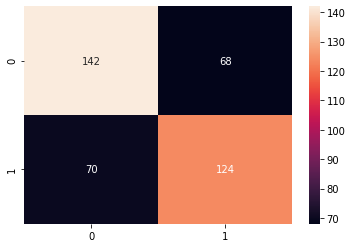

In [39]:
#Decision Tree
predictions = dtree.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
#print(confusion_matrix(y_test,predictions))
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True,fmt="d")

In [40]:
#Random Forest{Since there are a large number of categorical variables, random forests is preferred over logistic regression.}
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       210
           1       0.76      0.76      0.76       194

    accuracy                           0.77       404
   macro avg       0.77      0.77      0.77       404
weighted avg       0.77      0.77      0.77       404



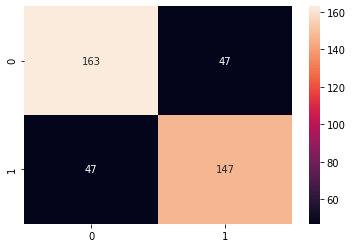

In [41]:
predrndmforest = rfc.predict(X_test)
print(classification_report(y_test,predrndmforest))
cm = confusion_matrix(y_test,predrndmforest)
sns.heatmap(cm,annot=True,fmt="d")

#### Important Features:

In [42]:
dict_add = {} 
for name,importance in zip(X_train.columns,rfc.feature_importances_):
    dict_add[name]=importance
dict_imp = sorted(dict_add.items(), key = lambda x:x[1], reverse = True)
#print(dict_imp)
for name, importance in dict_imp:
    print(name, '=', importance)

Age = 0.14060426449631785
vs_hr_hrAvg = 0.10382406005760644
bmi = 0.08459819780780369
s_bp_noninvasive(d)Avg = 0.0594602297085153
s_bp_noninvasive(d)Max = 0.05523497528682171
vs_hr_hrMin = 0.05324295193379179
vs_hr_hrMax = 0.04998367113283509
vs_bp_noninvasive(s)Avg = 0.03927326248962031
xp_resp_spo2Max = 0.03479243199327022
vs_bp_noninvasive(s)Max = 0.03442303140898221
xp_resp_spo2Min = 0.03304502715186575
s_bp_noninvasive(d)Min = 0.0327959339824841
xp_resp_rate_ptMin = 0.03192621316300276
vs_bp_noninvasive(s)Min = 0.0317815957649185
xp_resp_spo2Avg = 0.03132736588773861
xp_resp_rate_ptAvg = 0.030967910938036677
duration_symptoms = 0.030352677894017955
xp_resp_rate_ptMax = 0.02957755362355755
smoke_vape_Yes = 0.0070543245405305845
symptoms___1.factor_Unchecked = 0.005748433829630893
htn.factor_Yes = 0.005214929053276673
dm.factor_Yes = 0.005213766739774359
sex.factor_Male = 0.005153126181732252
symptoms___10.factor_Unchecked = 0.004985803337315097
Ed_before_order_set_Yes = 0.004886720

### Creating new features like Time Series Data(Quantile(0.25),Q(0.75)), weight_status, age category

In [43]:
final_data1 = pd.get_dummies(combined,drop_first = True)
#final_data1.T

In [46]:
#The Weight Status is decided from BMI ranges taken from Centre for Disease Control and Prevention (https://www.cdc.gov/healthyweight/assessing/).Categorized as Underweight,Normal, Overweight, Obese resp.

Baselines['weight_status'] = pd.cut(x = Baselines['bmi'],bins = [0, 18.5, 24.9, 29.9, 60],labels = ['underweight','normal','overweight','obese'])

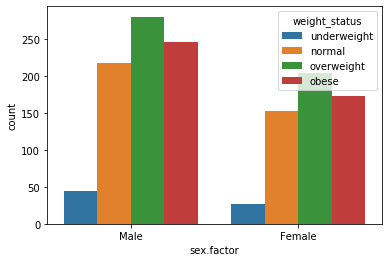

In [49]:
sns.countplot(x="sex.factor", hue="weight_status", data=Baselines)

In [50]:
Baselines = Baselines.drop(columns = ['weight_status'])

In [51]:
#The Weight Status is decided from BMI ranges taken from Centre for Disease Control and Prevention (https://www.cdc.gov/healthyweight/assessing/).Categorized as Underweight,Normal, Overweight, Obese resp.

final_data1['weight_status'] = pd.cut(x = Baselines['bmi'],bins = [0, 18.5, 24.9, 29.9, 60],labels = [0,1,2,3])

In [52]:
final_data1['Age_category'] = pd.cut(x = final_data1['Age'], bins = [0, 40, 60, 80, 120], labels = [0,1,2,3])

In [53]:
#Does Quantile(0.25) of all the grouped values
def q25(x):
    return x.quantile(0.25)

LVq25 = LabVit.groupby(['subject', 'name'],as_index = False).agg({'value': q25})
LaViq25=LVq25.pivot(index='subject', columns='name', values='value').reset_index()
LaViq25=LaViq25.rename(columns = {"s_bp_noninvasive (d)":"s_bp_noninvasive(d)q25","vs_bp_noninvasive (s)":"vs_Labp_noninvasive(s)q25","vs_hr_hr":"vs_hr_hrq25","xp_resp_rate_pt":"xp_resp_rate_ptq25","xp_resp_spo2":"xp_resp_spo2q25"})
LaViq25

name,subject,s_bp_noninvasive(d)q25,vs_Labp_noninvasive(s)q25,vs_hr_hrq25,xp_resp_rate_ptq25,xp_resp_spo2q25
0,655528,60.126181,127.583502,70.541252,29.451060,89.279046
1,729545,57.523701,127.173381,71.349564,28.860239,91.270237
2,805568,58.543108,127.523197,72.899532,28.268134,90.374399
3,895876,58.194272,130.062418,75.323073,27.880565,90.798072
4,905164,57.610357,128.170852,76.011808,26.965862,90.886343
...,...,...,...,...,...,...
1497,90277384,58.696196,127.999682,72.478929,28.214819,92.269642
1498,90277636,61.536860,127.116860,73.261007,28.041442,90.145226
1499,90277804,60.144075,130.107803,74.183293,26.813167,88.641956
1500,90284224,58.476608,128.141211,74.293791,29.304823,88.815733


In [54]:
def q75(x):
    return x.quantile(0.75)

LVq75 = LabVit.groupby(['subject', 'name'],as_index = False).agg({'value': q75})
LaViq75=LVq75.pivot(index='subject', columns='name', values='value').reset_index()
LaViq75=LaViq75.rename(columns = {"s_bp_noninvasive (d)":"s_bp_noninvasive(d)q75","vs_bp_noninvasive (s)":"vs_Labp_noninvasive(s)q75","vs_hr_hr":"vs_hr_hrq75","xp_resp_rate_pt":"xp_resp_rate_ptq75","xp_resp_spo2":"xp_resp_spo2q75"})
LaViq75

name,subject,s_bp_noninvasive(d)q75,vs_Labp_noninvasive(s)q75,vs_hr_hrq75,xp_resp_rate_ptq75,xp_resp_spo2q75
0,655528,62.282802,132.472125,74.712937,31.504574,92.488797
1,729545,60.052733,129.279247,74.654630,30.644779,94.444267
2,805568,62.277383,131.557747,77.171908,31.394579,91.850608
3,895876,60.504697,134.194457,77.761161,32.299496,94.350488
4,905164,59.759116,130.332312,77.988947,30.431132,92.864745
...,...,...,...,...,...,...
1497,90277384,61.548991,131.216632,74.826941,30.212819,95.429618
1498,90277636,62.870692,132.139681,76.897993,32.892331,94.439141
1499,90277804,61.879870,132.909083,77.338117,30.694674,93.936370
1500,90284224,61.380291,133.076251,77.603200,32.083410,93.040371


In [55]:
final_data1 = pd.merge(final_data1, LaViq25, on = 'subject', how='left')
final_data1 = pd.merge(final_data1, LaViq75, on = 'subject', how='left')

In [56]:
from sklearn.model_selection import train_test_split
X1 = final_data1.drop('event',axis=1)
y1 = final_data1['event']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=101)

In [57]:
dtree1 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None, max_features=None, max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, presort=False, random_state=None,splitter='best')
dtree1.fit(X_train1,y_train1)

/home/rishabh/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       142
           1       0.71      0.72      0.71       127

    accuracy                           0.72       269
   macro avg       0.72      0.72      0.72       269
weighted avg       0.73      0.72      0.73       269



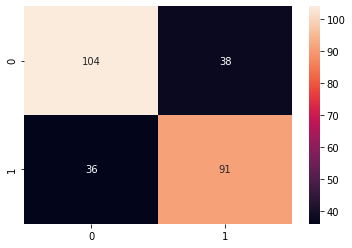

In [58]:
#TEST_SIZE:0.2
predictions1 = dtree1.predict(X_test1)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,predictions1))
#print(confusion_matrix(y_test,predictions))
cm = confusion_matrix(y_test1,predictions1)
sns.heatmap(cm,annot=True,fmt="d")

In [60]:
rfc1 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rfc1.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       142
           1       0.80      0.80      0.80       127

    accuracy                           0.81       269
   macro avg       0.81      0.81      0.81       269
weighted avg       0.81      0.81      0.81       269



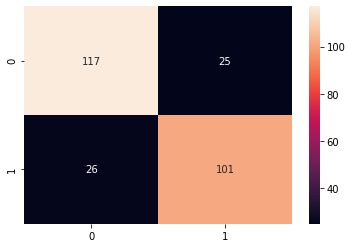

In [61]:
#There shoud be no compromise for increasing FN. Here, FN is constant but accuracy dec. on addition of features like Time Series(Quantile),weight_status,age category
#Test_Size = 0.2
predrndmforest1 = rfc1.predict(X_test1)
print(classification_report(y_test1,predrndmforest1))
cm = confusion_matrix(y_test1,predrndmforest1)
sns.heatmap(cm,annot=True,fmt="d")

#### Result : False Negatives decreases and a bit of accuracy increases after addition of features like Time Series Data(Quantile(0.25),Q(0.75)), weight_status, age category. We can also see the features that features like vs_hr, s_bp(d) etc. with quantile .25 and .75 are having higher features importance.  

In [62]:
dict_add1 = {} 
for name,importance in zip(X_train1.columns,rfc1.feature_importances_):
    dict_add1[name]=importance
dict_imp = sorted(dict_add1.items(), key = lambda x:x[1], reverse = True)
#print(dict_imp)
for name, importance in dict_imp:
    print(name, '=', importance)

Age = 0.0954403174822522
vs_hr_hrAvg = 0.06136785832004634
bmi = 0.05859006314068148
vs_hr_hrq25 = 0.057651037611325215
vs_hr_hrq75 = 0.05356652693800825
Age_category = 0.05065707317624688
s_bp_noninvasive(d)q75 = 0.03535428623449623
s_bp_noninvasive(d)Avg = 0.034232803771722234
s_bp_noninvasive(d)Max = 0.03419016649675266
vs_hr_hrMax = 0.028771014225868672
vs_Labp_noninvasive(s)q75 = 0.028526637168357637
vs_hr_hrMin = 0.027909667292121194
vs_bp_noninvasive(s)Avg = 0.024383981807973465
s_bp_noninvasive(d)q25 = 0.023148553462115334
vs_bp_noninvasive(s)Max = 0.02195663035908798
xp_resp_spo2Max = 0.02121660736086421
s_bp_noninvasive(d)Min = 0.02104802810018909
xp_resp_spo2q75 = 0.020361682692626327
weight_status = 0.02026637318572991
xp_resp_spo2Min = 0.01995517326623283
xp_resp_spo2q25 = 0.019885351369489022
duration_symptoms = 0.019762574958425223
vs_Labp_noninvasive(s)q25 = 0.019731902450283365
xp_resp_rate_ptMax = 0.019339918522358956
xp_resp_rate_ptMin = 0.019158715742493556
xp_resp_

### Removing some features of symptoms 1,8,9,10 , Chest X-Ray Results 0 and 1 (consulted with Pathologist). Test size was taken to be 0.20 and does Hyperparameter Tuning

In [69]:
#On consulting with a pathologist,removed Symptom1,symptom 10, symptom 9, symptom 8 , first_cxr0, first_cxr1 as it should play no role for alloting ventilators
final_data2 = final_data1.drop(columns = ['symptoms___1.factor_Unchecked','symptoms___8.factor_Unchecked','symptoms___9.factor_Unchecked','symptoms___10.factor_Unchecked','first_cxr_results___0.factor_Unchecked','first_cxr_results___1.factor_Unchecked'])

In [75]:
from sklearn.model_selection import train_test_split
X2 = final_data2.drop('event',axis=1)
y2 = final_data2['event']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=101)

In [76]:
dtree2 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None, max_features=None, max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, presort=False, random_state=None,splitter='best')
dtree2.fit(X_train2,y_train2)

/home/rishabh/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       142
           1       0.69      0.72      0.71       127

    accuracy                           0.72       269
   macro avg       0.72      0.72      0.72       269
weighted avg       0.72      0.72      0.72       269



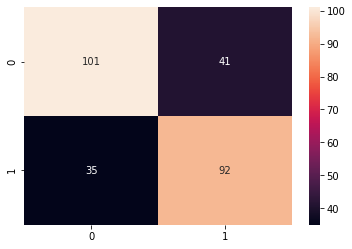

In [78]:
#Test_Size : 0.2
predictions2 = dtree2.predict(X_test2)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test2,predictions2))
cm = confusion_matrix(y_test2,predictions2)
sns.heatmap(cm,annot=True,fmt="d")

In [79]:
rfc2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rfc2.fit(X_train2,y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       142
           1       0.80      0.80      0.80       127

    accuracy                           0.81       269
   macro avg       0.81      0.81      0.81       269
weighted avg       0.81      0.81      0.81       269



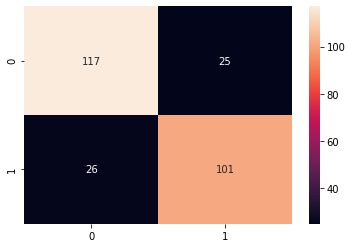

In [80]:
predrndmforest2 = rfc2.predict(X_test2)
print(classification_report(y_test2,predrndmforest2))
cm = confusion_matrix(y_test2,predrndmforest2)
sns.heatmap(cm,annot=True,fmt="d")

### Hyperparameter Tuning Grid Search

In [ ]:
#This was once trained to get best parameters and it took a lot of time.

# from sklearn.model_selection import GridSearchCV
# model = RandomForestClassifier()
# param_grid = [
# {'n_estimators': [100,300,500,600,700,900], 'min_samples_split': [2,5,15,50], 
#  'max_depth': [None,3,5,7,9], 'min_samples_leaf':[1,2,5,10]}
# ]
# # 700, 5,7,1
# grid_search_result = model.grid_search(grid, 
#                                        X=train_data, 
#                                        y=train_labels, 
#                                        plot=True)
# grid_search_forest = GridSearchCV(model, param_grid, cv=4, scoring='recall')
# grid_search_forest.fit(X_train2, y_train2)

In [ ]:
# Rfc2_best = grid_search_forest.best_estimator_
# print(Rfc2_best)

In [ ]:
# grid_search_forest.best_params_
#Best Params: 700, 5, None, 1

#### Using Best Model for Predicting

In [ ]:
# PredRndmFrst2 = Rfc2_best.predict(X_test2)
# print(classification_report(y_test2,PredRndmFrst2))
# print(confusion_matrix(y_test2,PredRndmFrst2))

In [81]:
m1 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
m1.fit(X_train2,y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       142
           1       0.80      0.79      0.79       127

    accuracy                           0.81       269
   macro avg       0.81      0.81      0.81       269
weighted avg       0.81      0.81      0.81       269



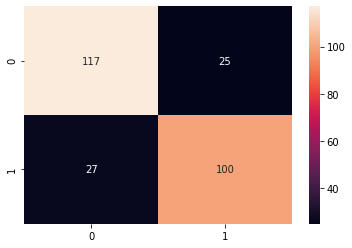

In [82]:
Pred1 = m1.predict(X_test2)
print(classification_report(y_test2,Pred1))
cm = confusion_matrix(y_test2,Pred1)
sns.heatmap(cm,annot=True,fmt="d")

### Result: There is decrease in False Negatives and a bit decrease in accuracy as compared to previous case when features were not removed. But  Hyperparameter tuning gives better results 

# CatBoost

In [83]:
Cat_data = pd.merge(combined, LaViq25, on = 'subject', how='left')
Cat_data = pd.merge(Cat_data, LaViq75, on = 'subject', how='left')
Cat_data['weight_status'] = pd.cut(x = Baselines['bmi'],bins = [0, 18.5, 24.9, 29.9, 60],labels = [0,1,2,3])
Cat_data['Age_category'] = pd.cut(x = Baselines['Age'], bins = [0, 40, 60, 80, 120], labels = [0,1,2,3])
Cat_data = Cat_data.drop(columns = ['subject'])
#Cat_data = Cat_data.drop(columns = ['subject','symptoms___1.factor','symptoms___8.factor','symptoms___9.factor','symptoms___10.factor','first_cxr_results___0.factor','first_cxr_results___1.factor'])

In [84]:
X = Cat_data.drop(columns = ['event'])
Y = Cat_data['event']
X.dtypes

Age                              float64
sex.factor                        object
bmi                              float64
hypoxia_ed.factor                 object
smoke_vape                        object
dm.factor                         object
htn.factor                        object
pulm___1.factor                   object
renal___1.factor                  object
renal___2.factor                  object
cad.factor                        object
cancer                            object
any_immunosuppression             object
symptoms___1.factor               object
symptoms___2.factor               object
symptoms___10.factor              object
symptoms___9.factor               object
symptoms___8.factor               object
symptoms___3.factor               object
first_cxr_results___0.factor      object
first_cxr_results___1.factor      object
first_cxr_results___2.factor      object
first_cxr_results___3.factor      object
duration_symptoms                  int64
Ed_before_order_

In [85]:
categorical_features_indices = np.where((X.dtypes=='object')|(X.dtypes=='category'))[0]
print(categorical_features_indices)

[ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 50 51]


In [86]:
im = {'unknown/No':0, 'Yes':1}
Cat_data['any_immunosuppression'] = Cat_data['any_immunosuppression'].map(im).fillna(Cat_data['any_immunosuppression'])

In [87]:
sex = {'Female':0, 'Male':1}
Cat_data['sex.factor'] = Cat_data['sex.factor'].map(sex).fillna(Cat_data['sex.factor'])

In [88]:
listYes = ['hypoxia_ed.factor','smoke_vape','dm.factor','htn.factor','cad.factor','cancer', 'Ed_before_order_set']
d = {'No': 0, 'Yes': 1}
for i in listYes:
    Cat_data[i] = Cat_data[i].map(d).fillna(Cat_data[i])

In [89]:
listch = ['pulm___1.factor','renal___1.factor','renal___2.factor','symptoms___1.factor','symptoms___2.factor','symptoms___3.factor','symptoms___8.factor','symptoms___9.factor','symptoms___10.factor','first_cxr_results___0.factor','first_cxr_results___1.factor','first_cxr_results___2.factor','first_cxr_results___3.factor' ]
lc = {'Unchecked':0 , 'Checked':1}
for i in listch:
    Cat_data[i] = Cat_data[i].map(lc).fillna(Cat_data[i])

In [90]:
Cat_data['weight_status'] = Cat_data['weight_status'].astype('int64')
Cat_data['Age_category'] = Cat_data['Age_category'].astype('int64')

In [91]:
X_c = Cat_data.drop(columns=['event'],axis=1)
y_c = Cat_data['event']
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_c, y_c, test_size=0.20, random_state=101)


In [92]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(iterations=10, learning_rate=0.1)

clf.fit(Xc_train, yc_train, cat_features=categorical_features_indices, eval_set=(Xc_test, yc_test), verbose=False)

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       142
           1       0.75      0.72      0.74       127

    accuracy                           0.75       269
   macro avg       0.75      0.75      0.75       269
weighted avg       0.75      0.75      0.75       269



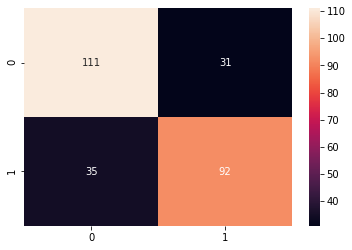

In [93]:
PredC = clf.predict(data = Xc_test)
print(classification_report(yc_test,PredC))
cm = confusion_matrix(yc_test,PredC)
sns.heatmap(cm,annot=True,fmt="d")

In [95]:
print(clf.feature_importances_)

[31.3636445   0.         13.92213753  0.          1.32180741  0.
  0.          0.31792842  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          2.06499273
  0.          2.40779327  1.92523739  5.40557372  0.          0.
  0.          0.          1.40650964  0.          0.          2.6040949
  0.          0.          0.          1.46651257  1.46327928  0.
 12.1534149   0.          1.57083657  7.71153569  1.60826501  9.19142296
  2.09501351  0.          0.          0.        ]


In [96]:
dict_add2 = {} 
for name,importance in zip(Xc_train.columns,clf.feature_importances_):
    dict_add2[name]=importance
dict_imp = sorted(dict_add2.items(), key = lambda x:x[1], reverse = True)
#print(dict_imp)
for name, importance in dict_imp:
    print(name, '=', importance)

Age = 31.36364450272393
bmi = 13.92213753244432
vs_hr_hrq25 = 12.153414899379126
vs_hr_hrq75 = 9.191422957052483
s_bp_noninvasive(d)q75 = 7.7115356871334395
vs_hr_hrAvg = 5.40557371764984
s_bp_noninvasive(d)Max = 2.604094896294682
s_bp_noninvasive(d)Avg = 2.4077932697311533
xp_resp_rate_ptq75 = 2.0950135100461953
duration_symptoms = 2.064992731338219
vs_bp_noninvasive(s)Avg = 1.9252373906377274
vs_Labp_noninvasive(s)q75 = 1.6082650109965466
xp_resp_spo2q25 = 1.5708365679474343
xp_resp_spo2Max = 1.466512570503051
s_bp_noninvasive(d)q25 = 1.4632792808191177
vs_hr_hrMin = 1.4065096393095633
smoke_vape = 1.3218074137648654
pulm___1.factor = 0.3179284222282993
sex.factor = 0.0
hypoxia_ed.factor = 0.0
dm.factor = 0.0
htn.factor = 0.0
renal___1.factor = 0.0
renal___2.factor = 0.0
cad.factor = 0.0
cancer = 0.0
any_immunosuppression = 0.0
symptoms___1.factor = 0.0
symptoms___2.factor = 0.0
symptoms___10.factor = 0.0
symptoms___9.factor = 0.0
symptoms___8.factor = 0.0
symptoms___3.factor = 0.0
f

### Hyperparameter Tuning

In [ ]:
#This was once trained to get best parameters and it took a lot of time.

# from sklearn.model_selection import GridSearchCV
# model = CatBoostClassifier()
# grid = {'iterations': [10,100,500],'learning_rate': [0.03, 0.1],'depth': [4, 6, 9],'l2_leaf_reg': [1, 3, 5, 7, 9]}

# grid_search_Cat = GridSearchCV(model, grid, cv = 4, scoring = 'recall')
# grid_search_Cat.fit(Xc_train, yc_train)

In [ ]:
# CatBo_best = grid_search_Cat.best_estimator_
# print(CatBo_best)

In [ ]:
# grid_search_Cat.best_params_
# Best Parameters: 500, 0.03, 6, 3

In [97]:
Cbest = CatBoostClassifier(iterations=500, learning_rate=0.03, depth=6, l2_leaf_reg=3)

Cbest.fit(Xc_train, yc_train, cat_features=categorical_features_indices, eval_set=(Xc_test, yc_test), verbose=False)

In [ ]:
PredCBest = Cbest.predict(Xc_test)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(yc_test,PredCBest))
#print(confusion_matrix(yc_test,PredCBest))
cm = confusion_matrix(yc_test,PredCBest)
sns.heatmap(cm,annot=True,fmt="d")

In [98]:
dict_add3 = {} 
for name,importance in zip(Xc_train.columns,Cbest.feature_importances_):
    dict_add3[name]=importance
dict_impCb = sorted(dict_add3.items(), key = lambda x:x[1], reverse = True)
#print(dict_imp)
for name, importance in dict_impCb:
    print(name, '=', importance)

Age = 10.670733398415067
bmi = 7.52666039401058
vs_hr_hrq25 = 6.939386614660416
Age_category = 6.408729881804083
vs_hr_hrq75 = 5.327982700602633
vs_hr_hrAvg = 4.407673207741513
s_bp_noninvasive(d)Avg = 4.247343661309676
vs_Labp_noninvasive(s)q75 = 4.239990062974031
s_bp_noninvasive(d)Max = 3.639950818656272
s_bp_noninvasive(d)q75 = 3.3143259925312427
duration_symptoms = 3.1933083256753956
weight_status = 3.1398395826126477
xp_resp_spo2Min = 2.389447874564163
s_bp_noninvasive(d)Min = 2.3019995092988115
vs_hr_hrMax = 2.2560649999913927
xp_resp_rate_ptMax = 2.144618525486642
vs_bp_noninvasive(s)Min = 2.1350343616229073
s_bp_noninvasive(d)q25 = 2.1274288765063143
smoke_vape = 2.0623663817180486
vs_bp_noninvasive(s)Avg = 1.8441239888505228
xp_resp_rate_ptq25 = 1.821093189413673
vs_bp_noninvasive(s)Max = 1.6810554186641435
xp_resp_spo2Max = 1.6641746944231424
vs_Labp_noninvasive(s)q25 = 1.5031274872073237
vs_hr_hrMin = 1.4368874718021833
xp_resp_spo2q25 = 1.393657866909471
xp_resp_spo2Avg = 

### Using Train_test split:0.2.  FN decreases